In [3]:
%load_ext autoreload
%autoreload 0

In [4]:
import sys
sys.path.append('/pollard/home/bsmith/Projects/haplo-benchmark/include/StrainFacts')

In [40]:
import sfacts as sf
import torch
import numpy as np

In [279]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

sns.set_context('talk')

In [54]:
x1 = pyro.sample(
    'x1',
    sf.model_zoo.components.ShiftedScaledDirichlet(alpha=torch.tensor([1., 1.]), p=torch.tensor([1., 1.]), a=torch.tensor(1.)).expand([int(1e5)])
)[:,0].numpy()
x2 = pyro.sample(
    'x2',
    sf.model_zoo.components.ShiftedScaledDirichlet(alpha=torch.tensor([1., 1.]), p=torch.tensor([1., 1.]), a=torch.tensor(2.)).expand([int(1e5)])
)[:,0].numpy()
x3 = pyro.sample(
    'x3',
    sf.model_zoo.components.ShiftedScaledDirichlet(alpha=torch.tensor([1., 1.]), p=torch.tensor([1., 1.]), a=torch.tensor(3.)).expand([int(1e5)])
)[:,0].numpy()

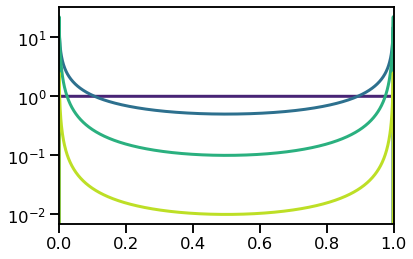

In [282]:
def prob(p, a=1.):
    p = np.asarray(p)
    a = torch.tensor(a)
    x = torch.tensor(np.stack([p, 1 - p])).T
    return np.exp(sf.model_zoo.components.ShiftedScaledDirichlet(alpha=torch.tensor([1., 1.]), p=torch.tensor([1., 1.]), a=a).log_prob(x).numpy())
    

for a, c in zip([1., 2., 10., 100.], np.linspace(0.1, 0.9, num=4)):
    pp = np.linspace(0, 1, num=1000)
    pdf = prob(pp, a=a)
    pdf = np.where(np.isfinite(pdf), pdf, 0)
    plt.plot(pp, pdf, c=mpl.cm.viridis(c), label=f'a={a}', lw=3)

plt.xlim(0, 1)
plt.yscale('log')
# plt.legend()
plt.minorticks_off()

plt.savefig('fig/binary_ssd_demo.png', dpi=400)

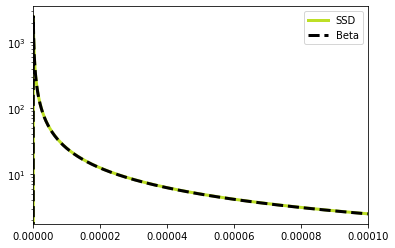

In [248]:
def prob_ssd(p, a=1.):
    p = np.asarray(p)
    a = torch.tensor(a)
    x = torch.tensor(np.stack([p, 1 - p])).T
    return np.exp(sf.model_zoo.components.ShiftedScaledDirichlet(alpha=torch.tensor([1., 1.]), p=torch.tensor([1., 1.]), a=a).log_prob(x).numpy())

def prob_beta(p, a=1.):
    p = torch.tensor(p)
    a = torch.tensor(a)
    return np.exp(pyro.distributions.Beta(a, a).log_prob(p).numpy())
    
a = 1000
c = 0.9  
pp = np.linspace(0, 0.0001, num=1000)

pdf = prob_ssd(pp, a=a)
pdf = np.where(np.isfinite(pdf), pdf, 0)
plt.plot(pp, pdf, c=mpl.cm.viridis(c), label=f'SSD', lw=3)

pdf = prob_beta(pp, a=1 / (2*a))
pdf = np.where(np.isfinite(pdf), pdf, 0)
plt.plot(pp, pdf, c='k', label=f'Beta', lw=3, linestyle='--')

plt.xlim(np.min(pp), np.max(pp))
plt.yscale('log')
plt.legend()

plt.savefig('fig/ssd_vs_beta_demo.png', dpi=400)

In [275]:
a = 10000000000
p = 0.5
np.log(prob_ssd(p, a=a)), np.log(prob_beta(p, a=1 / (2*a)))

(-23.025850295881877, -23.025852)

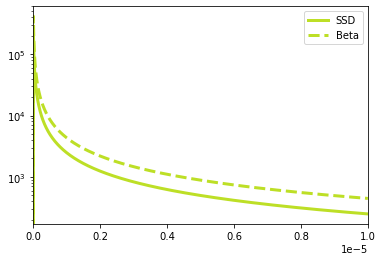

In [194]:
def prob_ssd(p, a=1.):
    p = np.asarray(p)
    a = torch.tensor(a)
    x = torch.tensor(np.stack([p, 1 - p])).T
    return np.exp(sf.model_zoo.components.ShiftedScaledDirichlet(alpha=torch.tensor([1., 1.]), p=torch.tensor([1., 1.]), a=a).log_prob(x).numpy())

def prob_beta(p, a=1.):
    p = torch.tensor(p)
    a = torch.tensor(a)
    return np.exp(pyro.distributions.Beta(a, a).log_prob(p).numpy())
    
a = 100
c = 0.9  
pp = np.linspace(0, 0.00001, num=1000)

pdf = prob_ssd(pp, a=a)
pdf = np.where(np.isfinite(pdf), pdf, 0)
plt.plot(pp, pdf, c=mpl.cm.viridis(c), label=f'SSD', lw=3)

pdf = prob_beta(pp, a=1 / a)
pdf = np.where(np.isfinite(pdf), pdf, 0)
plt.plot(pp, pdf, c=mpl.cm.viridis(c), label=f'Beta', lw=3, linestyle='--')

plt.xlim(np.min(pp), np.max(pp))
plt.yscale('log')
plt.legend()

plt.savefig('fig/ssd_vs_beta_demo_zoom.png', dpi=400)

In [195]:
pdf

array([     0.        , 415537.77172461, 209214.03343846, 140042.69780083,
       105334.61745172,  84455.9424969 ,  70508.38752784,  60528.99522698,
        53033.64057972,  47196.57109232,  42521.69184211,  38692.94458701,
        35499.40794947,  32794.92400314,  30475.00575417,  28462.96961444,
        26701.26130108,  25145.8390559 ,  23762.4265648 ,  22523.94752753,
        21408.72877917,  20399.21607996,  19481.0396448 ,  18642.32309752,
        17873.16493653,  17165.24426746,  16511.51738734,  15905.9816952 ,
        15343.49011839,  14819.60387635,  14330.47464765,  13872.74950931,
        13443.49367303,  13040.12724837,  12660.37314827,  12302.21391164,
        11963.85571113,  11643.69818865,  11340.3090463 ,  11052.40254051,
        10778.82119702,  10518.52019757,  10270.55399375,  10034.06478563,
         9808.27256915,   9592.46650845,   9385.99743179,   9188.27128393,
         8998.74339572,   8816.91345423,   8642.32107558,   8474.54189775,
         8313.18412352,  

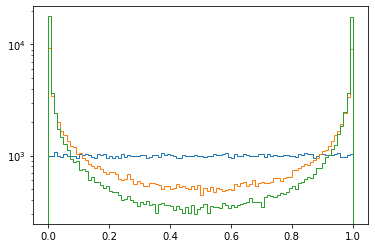

In [60]:
bins=np.linspace(0, 1, num=101)

plt.hist(x1, bins=bins, histtype='step')
plt.hist(x2, bins=bins, histtype='step')
plt.hist(x3, bins=bins, histtype='step')

plt.yscale('log')
# plt.xlim(0, 1)
None